In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
Beneficiaries = pd.read_csv('Beneficiaries.csv')

collated_final = pd.read_excel(open('COLLATED LIST WITH BENEFICIARIES.xlsx', 'rb'),sheet_name ='COLLATED - final')

Above_Budget = pd.read_excel(open('COLLATED LIST WITH BENEFICIARIES.xlsx', 'rb'), sheet_name='Above fund budget')



In [5]:
len(collated_final)

687

In [6]:
len(Beneficiaries)

614

In [7]:
len(Above_Budget)

73

# Beneficiaries

In [8]:
Beneficiaries.head()

,TRUE/FALSE,SEX,TITLE,FIRST NAME,MIDDLE NAME,LAST NAME,DATE OF BIRTH,HOME ADDRESS,OCCUPATION,PHONE NO,BANK,ALLOTMENT,ACCOUNT NO,REMARK,SECTOR,YEARS IN BUSINESS,SCORE,AMOUNT,DECLINE/GRANT
0,False,Female,Mrs,Ramota,NaN,Alabi,14/06/1967,block 4 rabiatu thompson,Trader,8025282602,GTB,40000,2.351631e+08,this should help achieve a pratical expansion ...,trading,10.0,98,200000,grant
1,False,Female,Mrs,Shakirat,Folashade,Mgbejume,21/07/1971,blk 14 flat 1 rabiatu thomopson crescent,Trader,8144458147,Polaris,60000,1.019705e+09,to be able to do bulk purchase and to enjoy si...,drink and pepper soup/bar,15.0,98,200000,grant
2,False,Female,Mrs,Hassan,Faosiyat,Amope,12/20/1965 0:00,block 19 flat 10 alhaji masha,Trader,8070573266,Polaris,100000,3.054400e+09,she has a shop where she sells soft drinks and...,Assorted Drinks,6.0,98,500000,grant
3,False,Female,Mrs,Sidikat,Abimbola,Adeboye,1944,"15B alh masha road, surulere",Trader,9098268523,UBA,40000,2.100231e+09,funds required to boost working capital,food vendor,30.0,98,0,grant
4,False,Female,Mrs,Idayat,NaN,Epemolu,12/8/1961 0:00,31 ogunmola street,Trader,8024035095,Access,100000,1.007506e+08,business has been existence for 12yrs and her ...,stationaries,12.0,98,100000,grant


In [9]:
#The total Number of Beneficiaries = 612
#Two applicants' name appeared in the beneficiaries list but their grant was declined i.e they didn't get any amount
len(Beneficiaries)

614

In [10]:
#The total allotment =  NGN42,500,000
Beneficiaries['ALLOTMENT'].sum()

42500000

In [11]:
#The maximum allotment = NGN200,000
Beneficiaries['ALLOTMENT'].max()

200000

In [12]:
#The minimum allotment given = NGN10,000 
#Two applicants' name appeared in the beneficiaries list but their grant was declined i.e they didn't get any amount
Beneficiaries.sort_values(by='ALLOTMENT', ascending=True).head()

,TRUE/FALSE,SEX,TITLE,FIRST NAME,MIDDLE NAME,LAST NAME,DATE OF BIRTH,HOME ADDRESS,OCCUPATION,PHONE NO,BANK,ALLOTMENT,ACCOUNT NO,REMARK,SECTOR,YEARS IN BUSINESS,SCORE,AMOUNT,DECLINE/GRANT
407,False,Female,Mrs,Aishat,Omolabake,Badmus,NaN,blk 1 flt 17 ogunmola close,Trader,8085049577,FirstBank,0,3.066231e+09,to build business,drinks,7.0,60,15000,decline
143,False,Female,Mrs,Bela,NaN,Ofularu,1976,michael ogun street,trader,813373149,access,0,7.446019e+07,not convinced business exists,beverage sales,0.0,85,200000,decline
295,False,Female,Mrs,Modino,Abolore,Okunlaya,26/06/1976,12 sanya street,trader,8034752140,UBA,10000,2.010775e+09,tailoring suppliers,fashion,0.0,70,300000,grant
512,False,Female,Miss,Oyindamola,Shadia,Omar,6/1/1989 0:00,24 hogan-bassey crescent,Trader,8108891593,Sterling,12000,6.977834e+07,NaN,drinks,6.0,55,300000,grant
331,False,Female,Mrs,Ajibola,Rashidat,Adeyinka,1/5/1980 0:00,blk 36 flt 4 alh masha road,Trader,9032748513,Polaris,15000,3.031426e+09,to support business volume capital,provision,0.0,68,250000,grant


In [13]:
#The average allotment given = NGN69,218
Beneficiaries['ALLOTMENT'].mean()

69218.24104234528

In [14]:
#The average number of years in business of all the applicants is approximately 9years
Beneficiaries['YEARS IN BUSINESS'].mean()

9.309527687296418

In [15]:
Beneficiaries.describe()

,PHONE NO,ALLOTMENT,ACCOUNT NO,YEARS IN BUSINESS,SCORE,AMOUNT
count,6.140000e+02,614.000000,6.110000e+02,614.000000,614.000000,6.140000e+02
mean,8.015405e+09,69218.241042,7.119398e+09,9.309528,72.000000,3.811564e+05
std,3.093217e+09,40154.123054,1.403578e+11,8.069405,14.165418,6.514232e+05
min,7.015442e+08,0.000000,4.011020e+05,0.000000,50.000000,0.000000e+00
25%,8.023725e+09,40000.000000,1.071991e+08,3.000000,60.000000,1.500000e+05
50%,8.037321e+09,50000.000000,4.279881e+08,7.000000,70.000000,2.000000e+05
75%,8.093073e+09,100000.000000,2.111424e+09,13.000000,85.000000,5.000000e+05
max,8.083721e+10,200000.000000,3.470000e+12,40.000000,98.000000,1.000000e+07


In [16]:
#The maximum score of applicants is 98 while the minimum score is 50
#The Average score of all applicants is 72

In [17]:
#The total amount requested by all the beneficiaries = NGN234,030,000
Beneficiaries['AMOUNT'].sum()

234030000

In [18]:
#The maximum amount requested by the validated beneficiaries = NGN10,000,000
Beneficiaries['AMOUNT'].max()

10000000

In [19]:
#The minimum amount requested by the validated beneficiaries = NGN0
Beneficiaries['AMOUNT'].min()

0

In [20]:
#The average amount requested by the validated beneficiaries is approximately NGN381,158
Beneficiaries['AMOUNT'].mean()

381156.35179153096

In [21]:
#The difference between the total amount requested by the applicants and the amount of allotment = NGN191,530,000
Beneficiaries['AMOUNT'].sum() - Beneficiaries['ALLOTMENT'].sum()

191530000

In [22]:
#Different occupation of all beneficiaries
Beneficiaries['OCCUPATION'].unique()

array(['Trader', 'Photograher', 'Business', 'fashion Designer', 'trader',
       'Fashion Designer', 'Tailoring', 'catering and decoration',
       'business', 'Event planner', 'Food Seller', 'Hair Dresser',
       'caterer', 'Building Contractor', 'Dry Cleaner', 'Lawma',
       'Hairdressing', 'Hairdresser', 'Trading', 'trading',
       'Make Over/Gele', 'clothing/textile', 'Stylist', 'Tailor',
       'Politician/ Travel Agent', 'Catering', 'entrepreneur', 'engineer',
       'fruit seller', 'computer operator', 'catering', 'Trader ',
       'artisan', 'Baker', 'Business woman', 'Confectionaries',
       'fruit trader', 'transporter', 'cosmetologist', 'Welder',
       'shoe making', 'tailoring', 'accessory designer', nan, 'cathering',
       'Furniture', ' business', 'cattle trader', 'enterpreneur',
       'business woman', 'make up artist', 'Self Employed',
       'nail technician', 'hair dresser', 'Foodstuff/ Provision Seller',
       'merchnical', 'photographer', 'Provision', 'Trans

Text(0.5, 1.0, 'The relationship between allotment and years in Business')

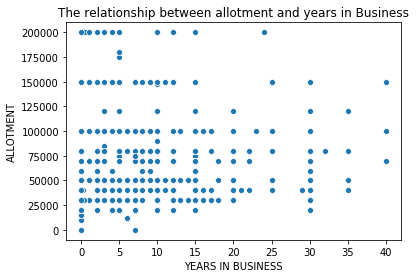

In [23]:
sns.scatterplot(x = Beneficiaries['YEARS IN BUSINESS'], y = Beneficiaries['ALLOTMENT'])
plt.title("The relationship between allotment and years in Business")

In [24]:
#From the graph above, there isn't a correlation between the years in 
#business of applicants and the amount allotted to them as grant

Text(0.5, 1.0, 'The relationship between allotment and scores of the beneficiaries')

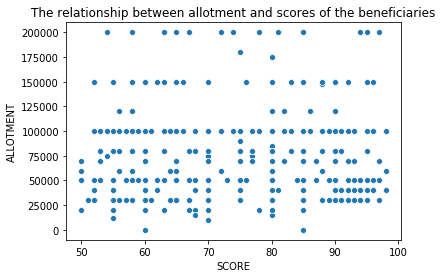

In [25]:
sns.scatterplot(x = Beneficiaries['SCORE'], y = Beneficiaries['ALLOTMENT'])
plt.title("The relationship between allotment and scores of the beneficiaries")

In [26]:
#From the graph above, there isn't a correlation between the scores of
# applicants and the amount allotted to them as grant

Text(0.5, 1.0, 'The amount requested by beneficiaries against the number of years in business')

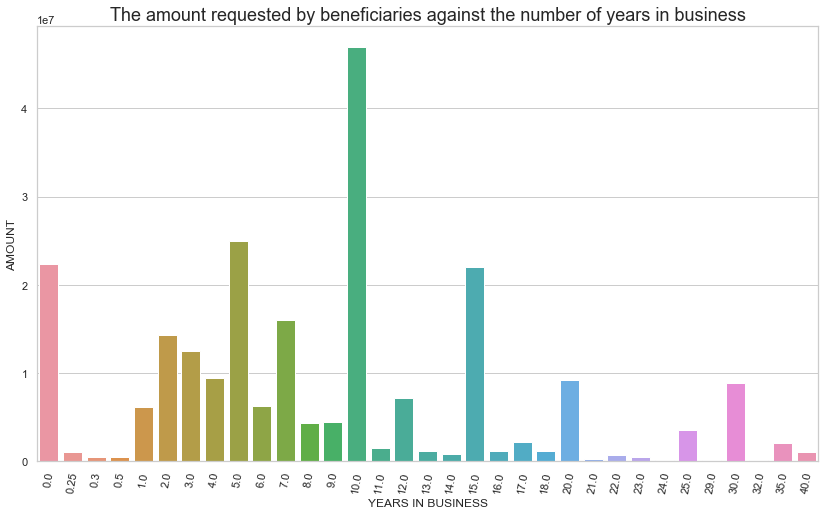

In [27]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(14, 8))
plt.xticks(rotation=80)
sns_plot = sns.barplot(x="YEARS IN BUSINESS", y="AMOUNT", data = Beneficiaries, estimator = sum, ci = None)
sns.set_context('notebook', font_scale = 1.5)
plt.title("The amount requested by beneficiaries against the number of years in business")

Text(0.5, 1.0, 'The allotment given against the number of years in business')

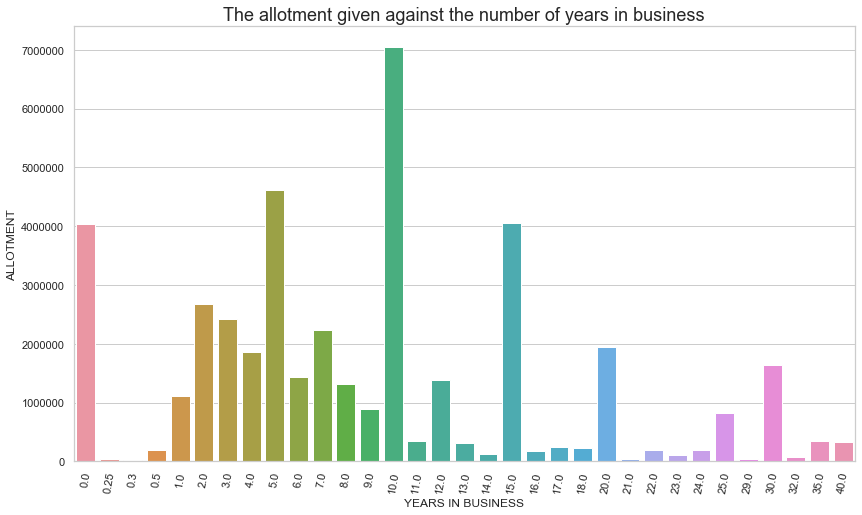

In [28]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(14, 8))
plt.xticks(rotation=80)
sns_plot = sns.barplot(x="YEARS IN BUSINESS", y="ALLOTMENT", data = Beneficiaries, estimator = sum, ci = None)
sns.set_context('notebook', font_scale = 1.5)
plt.title("The allotment given against the number of years in business")

Text(0.5, 1.0, 'The allotment given against the number of scores of beneficiaries')

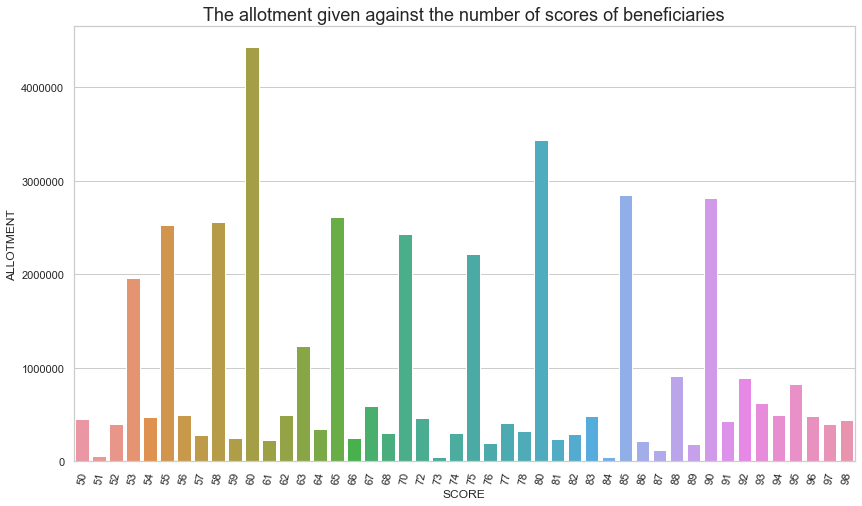

In [120]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(14, 8))
plt.xticks(rotation=80)
sns_plot = sns.barplot(x="SCORE", y="ALLOTMENT", data = Beneficiaries, estimator = sum, ci = None)
sns.set_context('notebook', font_scale = 1.5)
plt.title("The allotment given against the number of scores of beneficiaries")

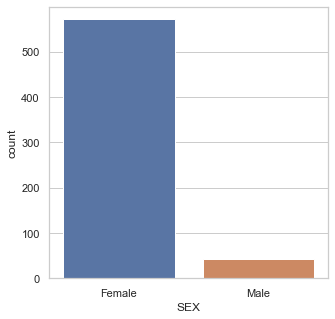

In [30]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
sns.countplot(x="SEX", data = Beneficiaries)
sns.set_context('notebook', font_scale = 2.0)


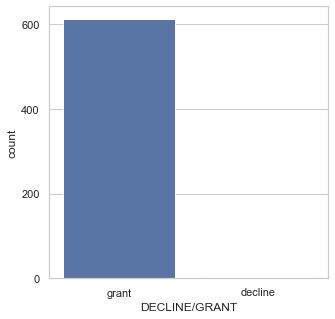

In [31]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
sns.countplot(x = "DECLINE/GRANT", data = Beneficiaries)
sns.set_context('notebook', font_scale = 2.0)



<Figure size 360x360 with 0 Axes>

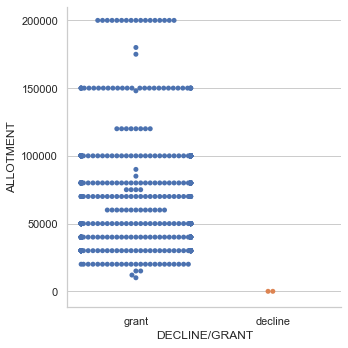

In [32]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
sns.catplot(x = 'DECLINE/GRANT', y = 'ALLOTMENT', data = Beneficiaries, kind = 'swarm')
sns.set_context('notebook', font_scale = 2.0)


In [33]:
Beneficiaries.loc[Beneficiaries['DATE OF BIRTH'].isna()]

,TRUE/FALSE,SEX,TITLE,FIRST NAME,MIDDLE NAME,LAST NAME,DATE OF BIRTH,HOME ADDRESS,OCCUPATION,PHONE NO,BANK,ALLOTMENT,ACCOUNT NO,REMARK,SECTOR,YEARS IN BUSINESS,SCORE,AMOUNT,DECLINE/GRANT
221,False,Female,Mrs,Grace,Olufunmilayo,Sogunro,NaN,17 royimi square,trader,8033053021,firstBank,100000,3.008757e+09,to scale up business,trading,5.0,80,500000,grant
396,False,Male,Mr,John,NaN,Adebayo,NaN,NaN,fashion designer,8029149649,GTB,100000,1.661759e+07,to purchase industrial machine,fashion,23.0,63,500000,grant
407,False,Female,Mrs,Aishat,Omolabake,Badmus,NaN,blk 1 flt 17 ogunmola close,Trader,8085049577,FirstBank,0,3.066231e+09,to build business,drinks,7.0,60,15000,decline
514,False,Female,Mrs,Kudirat,Omolara,Seriki,NaN,15/11/19790,business,8063703775,Gtb,20000,4.260507e+08,to boost business,shoe and cards,0.0,55,2000000,grant
517,False,Male,Mr,Omoshola,Odunayo,Omolaja,NaN,NaN,NaN,8157189594,Zenith,40000,2.251253e+09,to boost business,groceries,12.0,55,400000,grant
606,False,Female,Mrs,Rabiat,A.,Lawson,NaN,2 onatoro lane barracks surulere,Trader,8023007540,UBA,60000,2.059782e+09,to boost my business,petty trading,15.0,50,250000,grant


In [34]:
#The total number of female beneficiaries is 571
(Beneficiaries['SEX'] == 'Female').sum()

571

In [35]:
#The total number of male beneficiaries is 43
(Beneficiaries['SEX'] == 'Male').sum()

43

In [36]:
#The total amount received by Female beneficiaries is NGN39,190,000
Beneficiaries.loc[Beneficiaries['SEX'] == 'Female']['ALLOTMENT'].sum()

39190000

In [37]:
#The total amount received by Female beneficiaries is NGN3,310,000
Beneficiaries.loc[Beneficiaries['SEX'] == 'Male']['ALLOTMENT'].sum()

3310000

# Above Budget

In [38]:
Above_Budget.head()

,FORM NO,TRUE/FALSE,SEX,TITLE,FIRST NAME,MIDDLE NAME,LAST NAME,DATE OF BIRTH,HOME ADDRESS,OCCUPATION,PHONE NO,BANK,ALLOTMENT,ACCOUNT NO,REMARK,SECTOR,YEARS IN BUSINESS,SCORE,AMOUNT,DECLINE/GRANT
0,609,False,Female,Alhaja,Mariam,Abio,Kareem,1946-12-12 00:00:00,blk 22 flat 18 rabiatu thompson crescent,trader,7080255931,gtb,50000,7.184945e+08,to support food beverages business,beverage,10,50.0,500000,grant
1,734,False,Female,Mrs,Grace,Adeola,Iranya,1961-09-05 00:00:00,NaN,Trader,8023701188,FirstBank,50000,3.005640e+09,funds needed for business expansion,footwear and bags,12,50.0,150000,grant
2,748,False,Male,mr,Uwumwonse,James,Osayi,25/5/1974,21 maduike way,massage therapist,8025518805,Polaris,50000,1.017513e+09,needs fund for shop and equipments,massage therapist,5,50.0,5000000,grant
3,777,False,Female,Mrs,Oluwafunmilayo,Abosede,Adekeye,16/10/1994,blk 42 flt 6 alhaji malsha road surulere,Stylist,9074201018,uba,10000,2.085265e+09,"uses house as a shop, fund is needed to expand",hair dressing,3,50.0,200000,grant
4,947,False,Male,Mr,Omodeji,Austin,Sise,1975-01-07 00:00:00,6 obafemi ajayi street,Barber,7052374887,Access,10000,5.380853e+07,needs funds for barbing business,barbing,4,50.0,200000,grant


In [39]:
#The total Number of Beneficiaries in the above budget sheet = 70
#Three beneficiaries were included in the sheet whereas their application was declined
len(Above_Budget)

73

In [40]:
#The total allotment for the above budget sheet =  NGN3,605,000
Above_Budget['ALLOTMENT'].sum()

3605000

In [41]:
#The maximum allotment in the above budget sheet= NGN150,000
Above_Budget['ALLOTMENT'].max()

150000

In [42]:
#The minimum allotment given = NGN10,000 
#Two applicants' name appeared in the beneficiaries list but their grant was declined i.e they didn't get any amount
Above_Budget.sort_values(by='ALLOTMENT', ascending=True).head()

,FORM NO,TRUE/FALSE,SEX,TITLE,FIRST NAME,MIDDLE NAME,LAST NAME,DATE OF BIRTH,HOME ADDRESS,OCCUPATION,PHONE NO,BANK,ALLOTMENT,ACCOUNT NO,REMARK,SECTOR,YEARS IN BUSINESS,SCORE,AMOUNT,DECLINE/GRANT
41,193,False,Female,Mrs,Aishat,Adenike,Tijani,1985-02-12 00:00:00,3F akerele extension,trader,8024939633,access,0,7.613027e+08,to finance food business,food seller,11,45.0,200000,decline
9,1022,False,Female,Mrs,Sefinatu,Oluwatoyin,Kareem,1980-10-11 00:00:00,"Block 38, Flat 16, Alhaji Masha",Trader,8054315762,GTB,0,1.624799e+08,sells in a shop opposite her house,groceries,2,50.0,300000,decline
64,23,False,Female,miss,Fatimoh,NaN,Keye,20/10/1988,"block 42, flat 6 alhaji masha road",business woman,7089792910,GTB,0,1.169425e+08,not approved,hair dressing,4,30.0,80000,decline
3,777,False,Female,Mrs,Oluwafunmilayo,Abosede,Adekeye,16/10/1994,blk 42 flt 6 alhaji malsha road surulere,Stylist,9074201018,uba,10000,2.085265e+09,"uses house as a shop, fund is needed to expand",hair dressing,3,50.0,200000,grant
4,947,False,Male,Mr,Omodeji,Austin,Sise,1975-01-07 00:00:00,6 obafemi ajayi street,Barber,7052374887,Access,10000,5.380853e+07,needs funds for barbing business,barbing,4,50.0,200000,grant


In [43]:
#The average allotment in the above budget sheet is approximately NGN49,384
Above_Budget['ALLOTMENT'].mean()

49383.561643835616

In [44]:
Above_Budget.describe()

,FORM NO,PHONE NO,ALLOTMENT,ACCOUNT NO,YEARS IN BUSINESS,SCORE,AMOUNT
count,73.000000,7.300000e+01,73.000000,7.200000e+01,73.000000,66.000000,7.300000e+01
mean,798.041096,8.219518e+09,49383.561644,1.302938e+09,8.616438,46.106061,3.971233e+05
std,418.820481,2.502954e+09,24957.536235,1.677841e+09,6.761061,4.503430,6.804196e+05
min,23.000000,8.034144e+08,0.000000,1.910200e+06,0.000000,29.000000,0.000000e+00
25%,519.000000,8.023975e+09,40000.000000,1.177536e+08,4.000000,45.000000,1.000000e+05
50%,813.000000,8.038446e+09,50000.000000,2.506292e+08,7.000000,47.000000,2.000000e+05
75%,1074.000000,8.126638e+09,50000.000000,2.082444e+09,12.000000,50.000000,5.000000e+05
max,1497.000000,2.763043e+10,150000.000000,7.300263e+09,30.000000,50.000000,5.000000e+06


In [45]:
#The maximum score of applicants in the above budget sheet is 50 while the minimum score is 29
#The Average score of all applicants in that sheet is approximately 46

In [46]:
#The total amount requested by all beneficiaries in the above budget sheet = NGN28,990,000
Above_Budget['AMOUNT'] = Above_Budget['AMOUNT'].astype(int)
Above_Budget['AMOUNT'].sum()


28990000

In [47]:
#The maximum amount requested by the beneficiaries in the above budget sheet = NGN5,000,000
Above_Budget['AMOUNT'].max()

5000000

In [48]:
#The minimum amount requested by the beneficiaries in the above budget sheet = NGN0
Above_Budget['AMOUNT'].min()

0

In [49]:
#The difference between the total amount requested by the beneficiaries in the above budget sheet
#and the amount of allotment = NGN25,385,000 
Above_Budget['AMOUNT'].sum() - Above_Budget['ALLOTMENT'].sum()

25385000

In [50]:
#Different occupation of all beneficiaries in the above budget sheet
Above_Budget['OCCUPATION'].unique()

array(['trader', 'Trader', 'massage therapist', 'Stylist', 'Barber',
       'business man', 'trader woman', 'Entrepreneur', 'business',
       'Civil Servant', 'Trader ', 'bakery worker', 'hair Dresser',
       'Plumbing Materials', 'trading', 'business woman'], dtype=object)

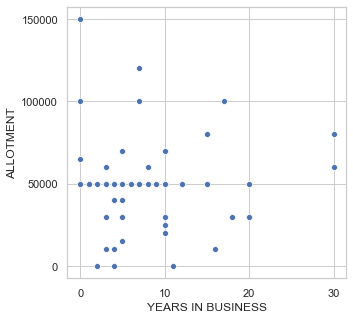

In [114]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
sns.scatterplot(x = Above_Budget['YEARS IN BUSINESS'], y = Above_Budget['ALLOTMENT'])
sns.set_context('notebook', font_scale = 2.0)


#plt.title("The relationship between allotment and years in Business for beneficiaries in above budget sheet")

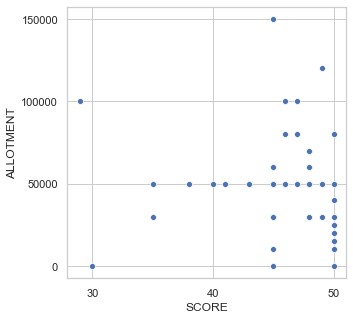

In [52]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
sns.scatterplot(x = Above_Budget['SCORE'], y = Above_Budget['ALLOTMENT'])
sns.set_context('notebook', font_scale = 2.0)


#plt.title("The relationship between allotment and scores of the beneficiaries in the above budget sheet")

Text(0.5, 1.0, 'The amount requested by beneficiaries in the above budget sheet against their number of years in business')

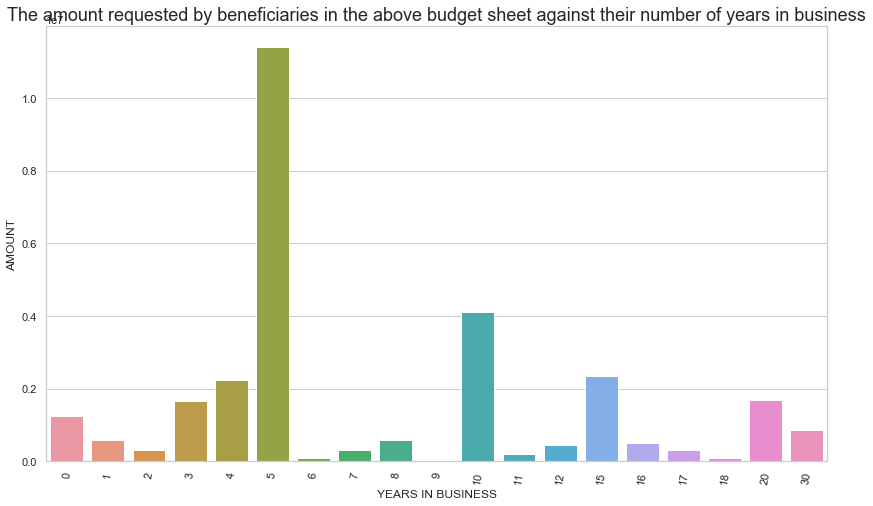

In [121]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(14, 8))
plt.xticks(rotation=80)
sns_plot = sns.barplot(x="YEARS IN BUSINESS", y="AMOUNT", data = Above_Budget, estimator = sum, ci = None)
sns.set_context('notebook', font_scale = 1.5)
plt.title("The amount requested by beneficiaries in the above budget sheet against their number of years in business")

Text(0.5, 1.0, 'The allotment given against the number of years in business for beneficiaries in the above budget sheet')

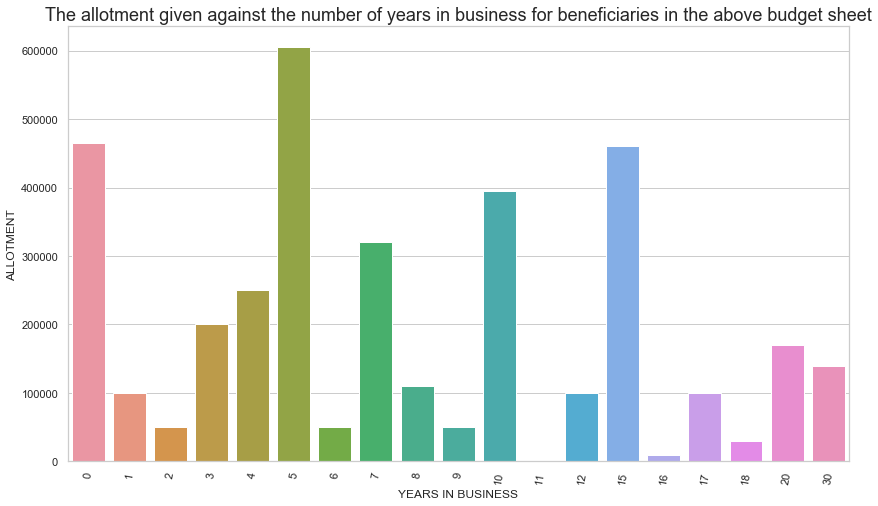

In [54]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(14, 8))
plt.xticks(rotation=80)
sns_plot = sns.barplot(x="YEARS IN BUSINESS", y="ALLOTMENT", data = Above_Budget, estimator = sum, ci = None)
sns.set_context('notebook', font_scale = 1.5)
plt.title("The allotment given against the number of years in business for beneficiaries in the above budget sheet")

Text(0.5, 1.0, 'The allotment given against the number of scores of beneficiaries in the above budget sheet')

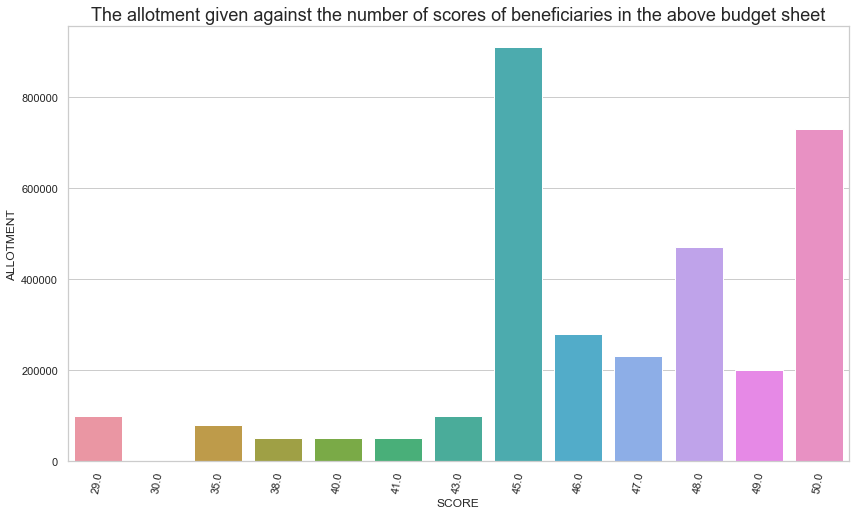

In [112]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(14, 8))
plt.xticks(rotation=80)
sns_plot = sns.barplot(x="SCORE", y="ALLOTMENT", data = Above_Budget, estimator = sum, ci = None)
sns.set_context('notebook', font_scale = 1.5)
plt.title("The allotment given against the number of scores of beneficiaries in the above budget sheet")

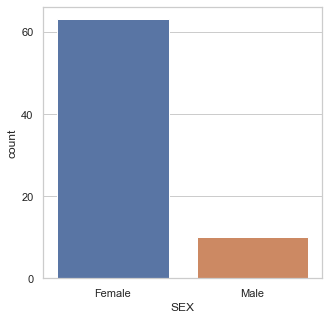

In [56]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
sns_plot = sns.countplot(x="SEX", data = Above_Budget)
sns.set_context('notebook', font_scale = 2.0)

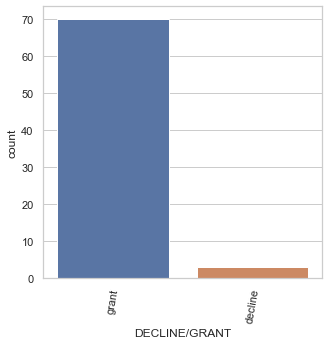

In [111]:

sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
plt.xticks(rotation=80)
sns.countplot(x = "DECLINE/GRANT", data = Above_Budget)
sns.set_context('notebook', font_scale = 1.5)



In [58]:
Beneficiaries.loc[Beneficiaries['SEX'] == 'Female']['ALLOTMENT'].max()


200000

In [59]:
Beneficiaries.loc[Beneficiaries['SEX'] == 'Female']['ALLOTMENT'].value_counts()

50000     134
100000    109
30000      83
40000      58
80000      58
70000      28
150000     27
20000      24
200000     15
60000      13
120000      7
75000       4
0           2
15000       2
85000       1
175000      1
90000       1
12000       1
10000       1
180000      1
148000      1
Name: ALLOTMENT, dtype: int64

In [60]:
#Beneficiaries.loc[Beneficiaries['SEX'] == 'Female']['ALLOTMENT']


In [61]:
Beneficiaries.loc[Beneficiaries['SEX'] == 'Male']['ALLOTMENT'].max()

200000

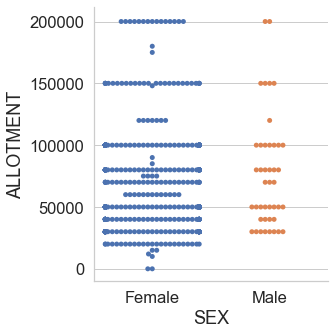

In [117]:

sns.catplot(x = 'SEX', y = 'ALLOTMENT', data = Beneficiaries, kind = 'swarm')





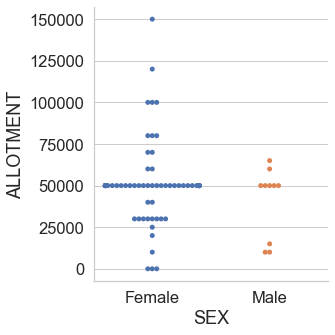

In [63]:
sns.catplot(x = 'SEX', y = 'ALLOTMENT', data = Above_Budget, kind = 'swarm')

In [64]:
collated_final.head()

,FORM NO,TRUE/FALSE,TITLE,SEX,FIRST NAME,MIDDLE NAME,LAST NAME,DATE OF BIRTH,HOME ADDRESS,OCCUPATION,PHONE NO,BANK,ALLOTMENT,ACCOUNT NO,REMARK,SECTOR,YEARS IN BUSINESS,SCORE,AMOUNT,DECLINE/GRANT
0,125,False,Mrs,Female,Ramota,NaN,Alabi,14/06/1967,block 4 rabiatu thompson,Trader,8025282602,GTB,40000,2.351631e+08,this should help achieve a pratical expansion ...,trading,10.0,98,200000.0,grant
1,412,False,Mrs,Female,Shakirat,Folashade,Mgbejume,21/07/1971,blk 14 flat 1 rabiatu thomopson crescent,Trader,8144458147,Polaris,60000,1.019705e+09,to be able to do bulk purchase and to enjoy si...,drink and pepper soup/bar,15.0,98,200000.0,grant
2,503,False,Mrs,Female,Hassan,Faosiyat,Amope,1965-12-20 00:00:00,block 19 flat 10 alhaji masha,Trader,8070573266,Polaris,100000,3.054400e+09,she has a shop where she sells soft drinks and...,Assorted Drinks,6.0,98,500000.0,grant
3,707,False,Mrs,Female,Sidikat,Abimbola,Adeboye,1944,"15B alh masha road, surulere",Trader,9098268523,UBA,40000,2.100231e+09,funds required to boost working capital,food vendor,30.0,98,0.0,grant
4,732,False,Mrs,Female,Idayat,NaN,Epemolu,1961-12-08 00:00:00,31 ogunmola street,Trader,8024035095,Access,100000,1.007506e+08,business has been existence for 12yrs and her ...,stationaries,12.0,98,100000.0,grant


In [65]:
collated_final['SEX'].isna().sum()

0

In [66]:
collated_final['ALLOTMENT'].isna().sum()

0

In [67]:
collated_final['SCORE'].isna().sum()

0

# Collated Final

In [68]:
#The total Number of appliants whose forms were collated = 687
#Five applicants' name appeared in the final collation list but their grant were declined i.e they didn't get any amount
len(collated_final)

687

In [69]:
#The total allotment =  NGN46,112,000
collated_final['ALLOTMENT'].sum()

46112000

In [70]:
#The maximum allotment = NGN200,000
collated_final['ALLOTMENT'].max()

200000

In [71]:
#The minimum allotment given = NGN10,000 
#Five applicants' name appeared in the final collation list but their grants were declined i.e they didn't get any amount
collated_final.sort_values(by='ALLOTMENT', ascending=True).head(7)

,FORM NO,TRUE/FALSE,TITLE,SEX,FIRST NAME,MIDDLE NAME,LAST NAME,DATE OF BIRTH,HOME ADDRESS,OCCUPATION,PHONE NO,BANK,ALLOTMENT,ACCOUNT NO,REMARK,SECTOR,YEARS IN BUSINESS,SCORE,AMOUNT,DECLINE/GRANT
655,193,False,Mrs,Female,Aishat,Adenike,Tijani,1985-02-12 00:00:00,3F akerele extension,trader,8024939633,access,0,7.613027e+08,to finance food business,food seller,11.0,45,200000.0,decline
407,122,False,Mrs,Female,Aishat,Omolabake,Badmus,NaN,blk 1 flt 17 ogunmola close,Trader,8085049577,FirstBank,0,3.066231e+09,to build business,drinks,7.0,60,15000.0,decline
143,269,False,Mrs,Female,Bela,NaN,Ofularu,1976,michael ogun street,trader,813373149,access,0,7.446019e+07,not convinced business exists,beverage sales,0.0,85,200000.0,decline
623,1022,False,Mrs,Female,Sefinatu,Oluwatoyin,Kareem,1980-10-11 00:00:00,"Block 38, Flat 16, Alhaji Masha",Trader,8054315762,GTB,0,1.624799e+08,sells in a shop opposite her house,groceries,2.0,50,300000.0,decline
678,23,False,miss,Female,Fatimoh,NaN,Keye,20/10/1988,"block 42, flat 6 alhaji masha road",business woman,7089792910,GTB,0,1.169425e+08,not approved,hair dressing,4.0,30,80000.0,decline
652,39,False,Mr,Male,Adeniyi,Hakeem,Yahya,1977-02-08 00:00:00,6 jeminatu buraimoh close,Trader,8023333885,weMA,10000,1.228930e+08,to support my business,PHONE ACCESSORIES,16.0,45,500000.0,grant
295,324,False,mrs,Female,Modino,Abolore,Okunlaya,26/06/1976,12 sanya street,trader,8034752140,UBA,10000,2.010775e+09,tailoring suppliers,fashion,0.0,70,300000.0,grant


In [72]:
#The average allotment given to all applicants is approximately NGN67,121
collated_final['ALLOTMENT'].mean()

67120.81513828239

In [73]:
#The average number of years in business of all the applicants is approximately 9years
collated_final['YEARS IN BUSINESS'].mean()

9.214046579330422

In [74]:
collated_final.describe()

,FORM NO,PHONE NO,ALLOTMENT,ACCOUNT NO,YEARS IN BUSINESS,SCORE,AMOUNT
count,687.000000,6.870000e+02,687.000000,6.830000e+02,687.000000,687.000000,6.860000e+02
mean,756.486172,8.037094e+09,67120.815138,6.507004e+09,9.214047,68.778748,3.828280e+05
std,432.550396,3.035014e+09,39314.812458,1.327754e+11,7.953035,16.977707,6.545497e+05
min,1.000000,7.015442e+08,0.000000,4.011020e+05,0.000000,0.000000,0.000000e+00
25%,394.500000,8.023786e+09,40000.000000,1.072631e+08,3.000000,55.000000,1.500000e+05
50%,751.000000,8.037441e+09,50000.000000,4.260507e+08,7.000000,66.000000,2.000000e+05
75%,1108.000000,8.095694e+09,100000.000000,2.109794e+09,13.000000,84.500000,5.000000e+05
max,1498.000000,8.083721e+10,200000.000000,3.470520e+12,40.000000,98.000000,1.000000e+07


In [75]:
#The maximum score of the applicants is 98 while the minimum score is 0
#The Average score of all the applicants is 68

In [76]:
#The total amount requested by all the applicants = NGN262,620,000
collated_final['AMOUNT'].sum()

262620000.0

In [77]:
#The minimum amount requested by all the applicants = NGN0
collated_final['AMOUNT'].min()

0.0

In [78]:
#The maximum amount requested by all the applicants = NGN10,000,000
collated_final['AMOUNT'].max()

10000000.0

In [79]:
#The average amount requested by all the applicants is approximately NGN382,827
collated_final['AMOUNT'].mean()

382827.9883381924

In [80]:
#The difference between the total amount requested by all the applicants and the allotment = NGN216,508,000
collated_final['AMOUNT'].sum() - collated_final['ALLOTMENT'].sum()

216508000.0

In [81]:
#Different occupation of all applicants
collated_final['OCCUPATION'].unique()

array(['Trader', 'trader', 'photograher', 'business', 'fashion Designer',
       'Fashion Designer', 'Business', 'Tailoring',
       'catering and decoration', 'Event planner', 'Food Seller',
       'Hair Dresser', 'caterer', 'Building Contractor', 'Dry Cleaner',
       'Lawma', 'Hairdressing', 'Hairdresser', 'Trading', 'trading',
       'Make Over/Gele', 'clothing/textile', 'Stylist', 'Tailor',
       'Politician/ Travel Agent', 'Catering', 'entrepreneur', 'engineer',
       'fruit seller', 'computer operator', 'catering', 'Trader ',
       'artisan', 'Baker', 'Business woman', 'Confectionaries',
       'fruit trader', 'transporter', 'cosmetologist', 'Welder',
       'shoe making', 'tailoring', 'accessory designer', nan, 'cathering',
       'Furniture', ' business', 'cattle trader', 'enterpreneur',
       'business woman', 'make up artist', 'Self Employed',
       'nail technician', 'hair dresser', 'Foodstuff/ Provision Seller',
       'merchnical', 'photographer', 'Provision', 'Trans

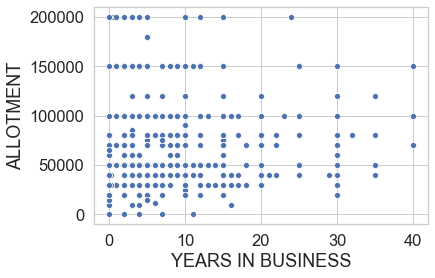

In [82]:
sns.scatterplot(x = collated_final['YEARS IN BUSINESS'], y = collated_final['ALLOTMENT'])
#plt.title("The relationship between allotment and years in Business of all applicants")

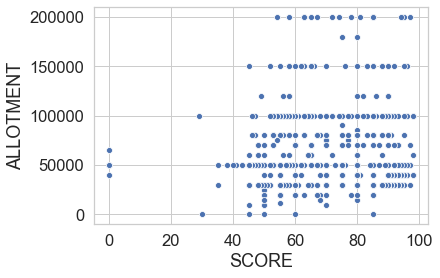

In [83]:
sns.scatterplot(x = collated_final['SCORE'], y = collated_final['ALLOTMENT'])
#plt.title("The relationship between allotment and scores of all applicants")

Text(0.5, 1.0, 'The amount requested by all applicants against their number of years in business')

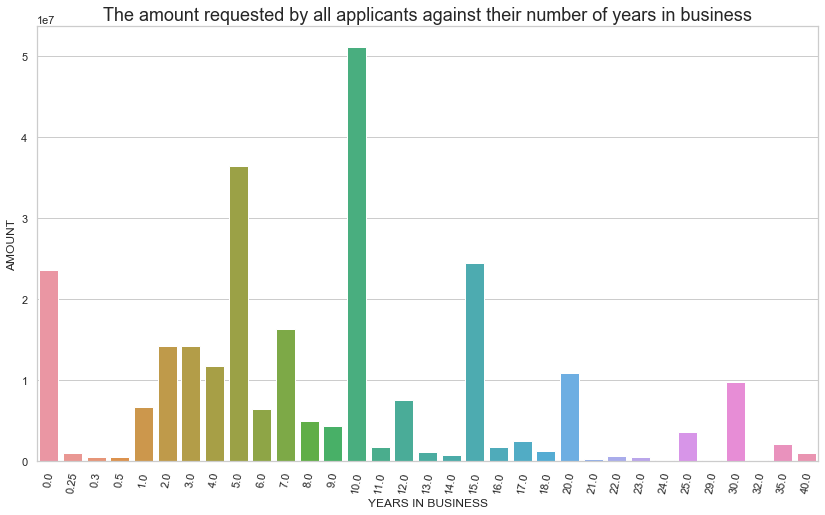

In [84]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(14, 8))
plt.xticks(rotation=80)
sns_plot = sns.barplot(x="YEARS IN BUSINESS", y="AMOUNT", data = collated_final, estimator = sum, ci = None)
sns.set_context('notebook', font_scale = 1.5)
plt.title("The amount requested by all applicants against their number of years in business")

Text(0.5, 1.0, 'The allotment given against the number of years in business of all applicants')

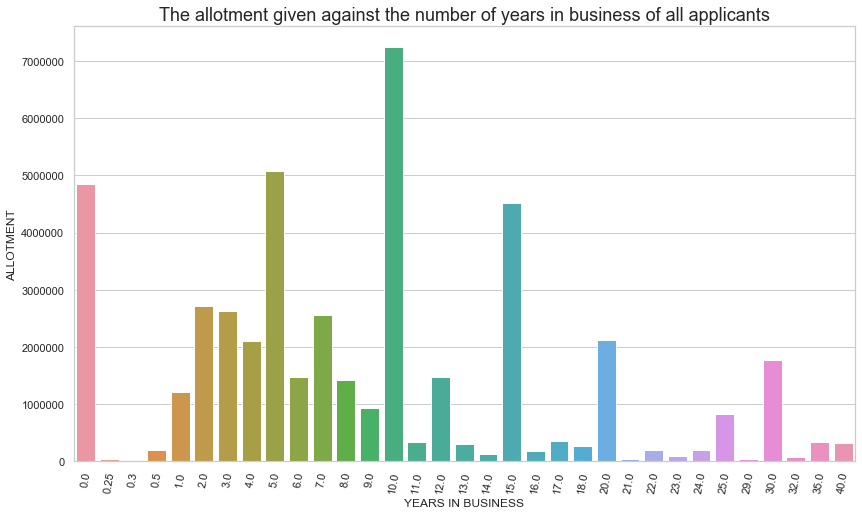

In [85]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(14, 8))
plt.xticks(rotation=80)
sns_plot = sns.barplot(x="YEARS IN BUSINESS", y="ALLOTMENT", data = collated_final, estimator = sum, ci = None)
sns.set_context('notebook', font_scale = 1.5)
plt.title("The allotment given against the number of years in business of all applicants")

Text(0.5, 1.0, 'The allotment given against the number of scores of all applicants')

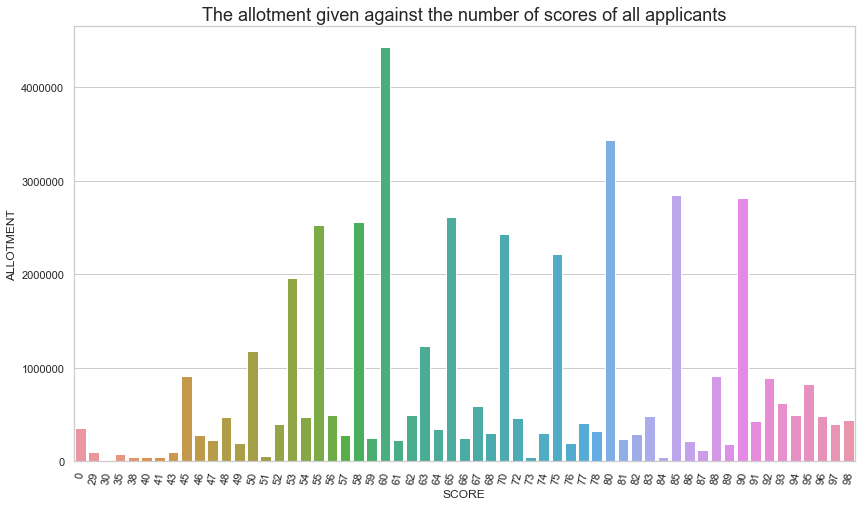

In [86]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(14, 8))
plt.xticks(rotation=80)
sns_plot = sns.barplot(x="SCORE", y="ALLOTMENT", data = collated_final, estimator = sum, ci = None)
sns.set_context('notebook', font_scale = 1.5)
plt.title("The allotment given against the number of scores of all applicants")

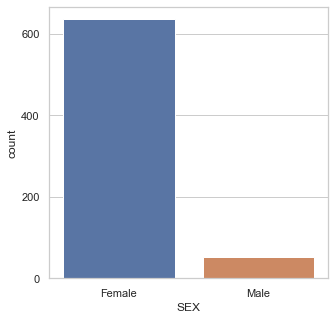

In [87]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
sns_plot = sns.countplot(x="SEX", data = collated_final)
sns.set_context('notebook', font_scale = 2.0)

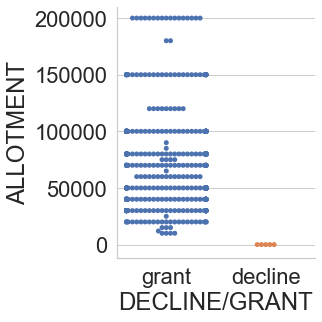

In [88]:
sns.catplot(x = 'DECLINE/GRANT', y = 'ALLOTMENT', data = collated_final, kind = 'swarm')

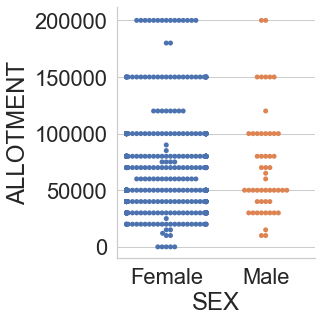

In [89]:
sns.catplot(x = 'SEX', y = 'ALLOTMENT', data = collated_final, kind = 'swarm')

In [90]:
Beneficiaries['OCCUPATION'].unique()

array(['Trader', 'Photograher', 'Business', 'fashion Designer', 'trader',
       'Fashion Designer', 'Tailoring', 'catering and decoration',
       'business', 'Event planner', 'Food Seller', 'Hair Dresser',
       'caterer', 'Building Contractor', 'Dry Cleaner', 'Lawma',
       'Hairdressing', 'Hairdresser', 'Trading', 'trading',
       'Make Over/Gele', 'clothing/textile', 'Stylist', 'Tailor',
       'Politician/ Travel Agent', 'Catering', 'entrepreneur', 'engineer',
       'fruit seller', 'computer operator', 'catering', 'Trader ',
       'artisan', 'Baker', 'Business woman', 'Confectionaries',
       'fruit trader', 'transporter', 'cosmetologist', 'Welder',
       'shoe making', 'tailoring', 'accessory designer', nan, 'cathering',
       'Furniture', ' business', 'cattle trader', 'enterpreneur',
       'business woman', 'make up artist', 'Self Employed',
       'nail technician', 'hair dresser', 'Foodstuff/ Provision Seller',
       'merchnical', 'photographer', 'Provision', 'Trans

In [91]:
mymap = {'Business': 'Entrepreneur', 
         'fashion Designer': 'Fashion Designer', 
         'trader': 'Trader', 
         'Tailoring': 'Fashion Designer', 
         'Food Seller': 'Food, Catering and Decoration',
         'food seller': 'Food, Catering and Decoration',
         'catering and decoration': 'Food, Catering and Decoration', 
         'Hair Dresser': 'Beauty Services',
         'business': 'Entrepreneur', 
         'Hairdressing': 'Beauty Services', 
         'trading': 'Trader',
         'Make Over/Gele': 'Beauty Services',
         'Trading': 'Trader', 
         'Tailor': 'Fashion Designer',
         'Catering': 'Food, Catering and Decoration', 
         'Trader ': 'Trader', 
         'Baker': 'Food and Catering and Decoration',
         'Business woman': 'Entrepreneur', 
         'Confectionaries': 'Food, Cathering and Decoration',
         'fruit trader': 'Trader', 
         'cosmetologist': 'Beauty Services',
         'tailoring': 'Fashion Designer',
         'accessory designer': 'Fashion Designer',
         'cathering': 'Food, Catering and Decoration',
         ' business': 'Entrepreneur',
         'cattle trader': 'Trader',
         'entrepreneur': 'Entrepreneur',
         'business woman': 'Entrepreneur',
         'make up artist': 'Beauty Services',
         'Self Employed': 'Entrepreneur',
         'nail technician': 'Beauty Services',
         'hair dresser': 'Beauty Services',
         'Foodstuff/ Provision Seller': 'Trader',
         'merchnical': 'Mechanic',
         'Provision': 'Trader',
         'fashion designer': 'Fashion Designer',
         'TRADER': 'Trader',
         'artisian': 'Artisan',
         'barbing': 'Beauty Services',
         'Journalist/ Trader': 'Trader',
         'Marketting': 'Marketer',
         'way akerele': 'Trader',
         'BUYING AND SELLING': 'Trader',
         'Cosmetologist': 'Beauty Services',
         'Jewelries Selling': 'Trader',
         'stylist': 'Fashion Designer',
         'Stylist': 'Fashion Desinger',
         'charcoal supplier': 'Trader',
         'petty trader':'Trader',
         'hair stylist': 'Beauty Services',
         'hair dressing': 'Beauty Services'}
Beneficiaries = Beneficiaries.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [92]:
Beneficiaries.OCCUPATION.unique()

array(['Trader', 'Photograher', 'Entrepreneur', 'Fashion Designer',
       'Food, Catering and Decoration', 'Event planner',
       'Beauty Services', 'caterer', 'Building Contractor', 'Dry Cleaner',
       'Lawma', 'Hairdresser', 'clothing/textile', 'Fashion Desinger',
       'Politician/ Travel Agent', 'engineer', 'fruit seller',
       'computer operator', 'catering', 'artisan',
       'Food and Catering and Decoration',
       'Food, Cathering and Decoration', 'transporter', 'Welder',
       'shoe making', nan, 'Furniture', 'enterpreneur', 'Mechanic',
       'photographer', 'Transporter', 'Artisan', 'Street', 'Marketer',
       'printer', 'Cleaner'], dtype=object)

In [93]:
Beneficiaries.OCCUPATION.value_counts()

Trader                              422
Entrepreneur                         90
Fashion Designer                     35
Food, Catering and Decoration        12
Beauty Services                      11
caterer                               4
Hairdresser                           4
fruit seller                          2
photographer                          2
catering                              2
Food and Catering and Decoration      2
Fashion Desinger                      2
Cleaner                               1
Marketer                              1
clothing/textile                      1
transporter                           1
Photograher                           1
shoe making                           1
Artisan                               1
Mechanic                              1
Street                                1
Event planner                         1
Building Contractor                   1
artisan                               1
Lawma                                 1


In [94]:
remap = {'Food and Catering and Decoration' : 'Food, Catering and Decoration',
         'caterer': 'Food, Catering and Decoration',
         'catering': 'Food, Catering and Decoration',
         'Fashion Desinger': 'Fashion Designer',
         'fruit seller': 'Trader',  
         'artisan': 'Artisan',
         'Food, Cathering and Decoration': 'Food, Catering and Decoration',
         'Photograher': 'photographer',
         'Dry Cleaner':'Cleaning Services',
         'Cleaner': 'Cleaning Services',
         'Lawma': 'Cleaning Services', 
         'Hairdresser': 'Beauty Services',
         'Welder': 'Artisan',
         'clothing/textile': 'Trader',
         'Furniture': 'Artisan',
         'enterpreneur': 'Entrepreneur',
         'shoe making': 'Artisan',
         'transporter':'Transporter',
         'engineer': 'Others',
         'Building Contractor': 'Others',
         'Marketer': 'Others',
         'Politician/ Travel Agent': 'Others',
         'Street': 'Others',                             
         'Mechanic': 'Others',                          
         'computer operator': 'Others',                  
         'Event planner': 'Others',                     
         'printer': 'Others'
          
        }
Beneficiaries = Beneficiaries.applymap(lambda s: remap.get(s) if s in remap else s)

In [95]:
Beneficiaries.OCCUPATION.unique()

array(['Trader', 'photographer', 'Entrepreneur', 'Fashion Designer',
       'Food, Catering and Decoration', 'Others', 'Beauty Services',
       'Cleaning Services', 'Artisan', 'Transporter', nan], dtype=object)

In [96]:
Beneficiaries.OCCUPATION.value_counts()

Trader                           425
Entrepreneur                      91
Fashion Designer                  37
Food, Catering and Decoration     21
Beauty Services                   15
Others                             9
Artisan                            5
Cleaning Services                  3
photographer                       3
Transporter                        2
Name: OCCUPATION, dtype: int64

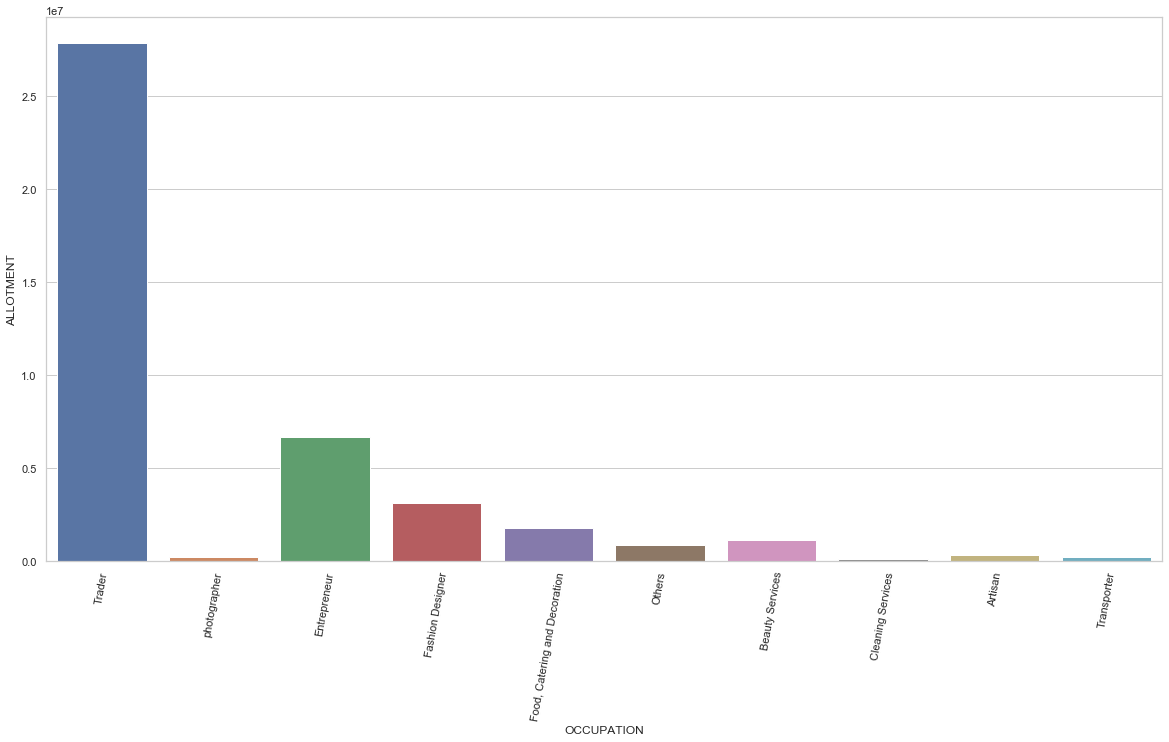

In [97]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(20, 10))
plt.xticks(rotation=80)
sns.barplot(x = 'OCCUPATION', y = 'ALLOTMENT', data = Beneficiaries, ci = None, estimator = sum)
sns.set_context('notebook', font_scale = 1.5)

In [98]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'Cleaning Services']['ALLOTMENT'].sum()

130000

In [99]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'photographer']['ALLOTMENT'].sum()

200000

In [100]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'Transporter']['ALLOTMENT'].sum()

230000

In [101]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'Artisan']['ALLOTMENT'].sum()

310000

In [102]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'Others']['ALLOTMENT'].sum()

880000

In [103]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'Beauty Services']['ALLOTMENT'].sum()

1120000

In [104]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'Food, Catering and Decoration']['ALLOTMENT'].sum()

1760000

In [105]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'Fashion Designer']['ALLOTMENT'].sum()

3130000

In [106]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'Entrepreneur']['ALLOTMENT'].sum()

6670000

In [107]:
Beneficiaries.loc[Beneficiaries.OCCUPATION == 'Trader']['ALLOTMENT'].sum()

27830000

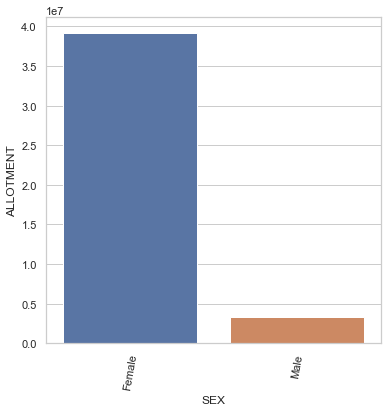

In [108]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(6, 6))
plt.xticks(rotation=80)
sns.barplot(x = 'SEX', y = 'ALLOTMENT', data = Beneficiaries, ci = None, estimator = sum)
sns.set_context('notebook', font_scale = 1.5)

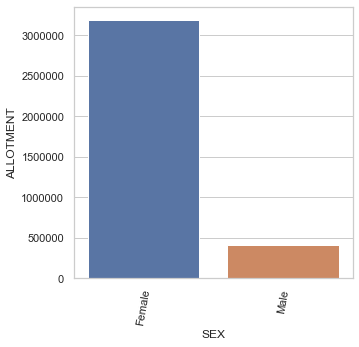

In [118]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
plt.xticks(rotation=80)
sns.barplot(x = 'SEX', y = 'ALLOTMENT', data = Above_Budget, ci = None, estimator = sum)
sns.set_context('notebook', font_scale = 1.5)

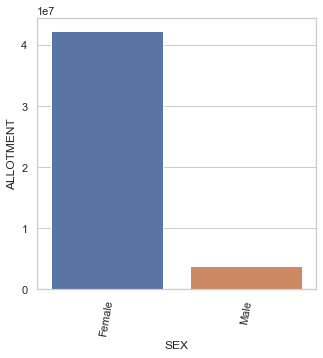

In [119]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(5, 5))
plt.xticks(rotation=80)
sns.barplot(x = 'SEX', y = 'ALLOTMENT', data = collated_final, ci = None, estimator = sum)
sns.set_context('notebook', font_scale = 1.5)